<a href="https://colab.research.google.com/github/dfdavila/AI6/blob/master/DL_Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip install fastai

     |████████████████████████████████| 69.4MB 8.8MB/s 
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0


In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [6]:
path = untar_data(URLs.PETS); path #Getting the data
print(f'Ruta{path}')

Ruta/root/.fastai/data/oxford-iiit-pet


In [7]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [8]:
print(path)
path_anno = path/'annotations'
path_img = path/'images'

/root/.fastai/data/oxford-iiit-pet


In [9]:
print(path_anno)
print(path_img )

/root/.fastai/data/oxford-iiit-pet/annotations
/root/.fastai/data/oxford-iiit-pet/images


In [10]:
fnames= get_image_files(path_img)
fnames[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_106.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_133.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_67.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_121.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_33.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_93.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_75.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_164.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_95.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_101.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$' #Regular expressions

In [12]:
data = ImageDataBunch.from_name_re(path_img, fnames,pat, ds_tfms=get_transforms(),size=224) #Loading the data
data.normalize(imagenet_stats) #Data Transformation

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Maine_Coon,Bombay,beagle,Sphynx,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,havanese,Bengal,samoyed,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

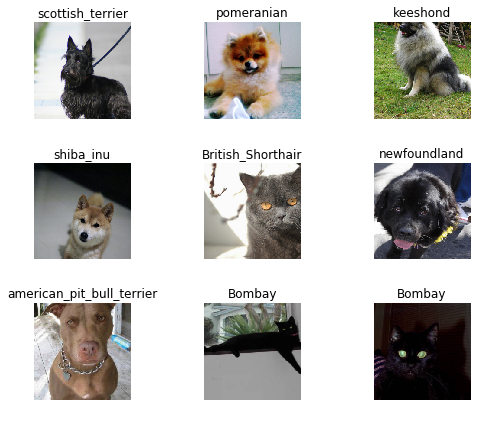

In [13]:
data.show_batch(rows=3, figsize=(7,6)) #Looking at the data

In [14]:
print(data.classes) #Looking at the labels
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

**Training a model using resnet architecture: resnet34**

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 20907093.40it/s]


In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.395018,0.349538,0.105548,40:36
1,0.545186,0.237909,0.077808,39:31
2,0.333060,0.214126,0.072395,40:22
3,0.249207,0.203650,0.066982,40:12


In [0]:
learn.save('stage-1') #Saving model weights

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

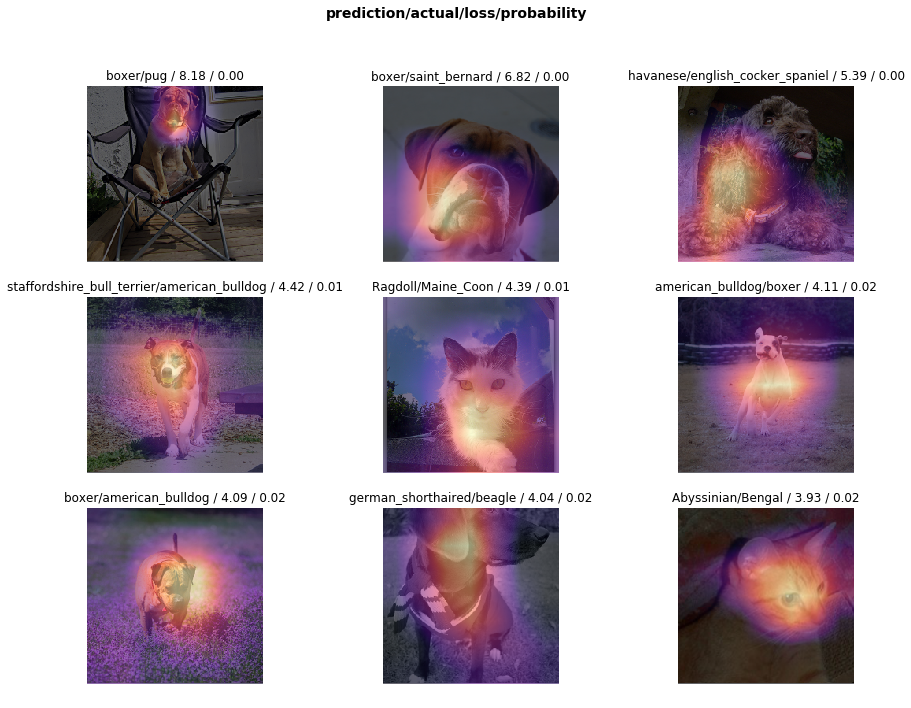

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
#Press doc para ver la documentacion

doc(interp.plot_top_losses)


TypeError: ignored

**Confusion Matrix:**

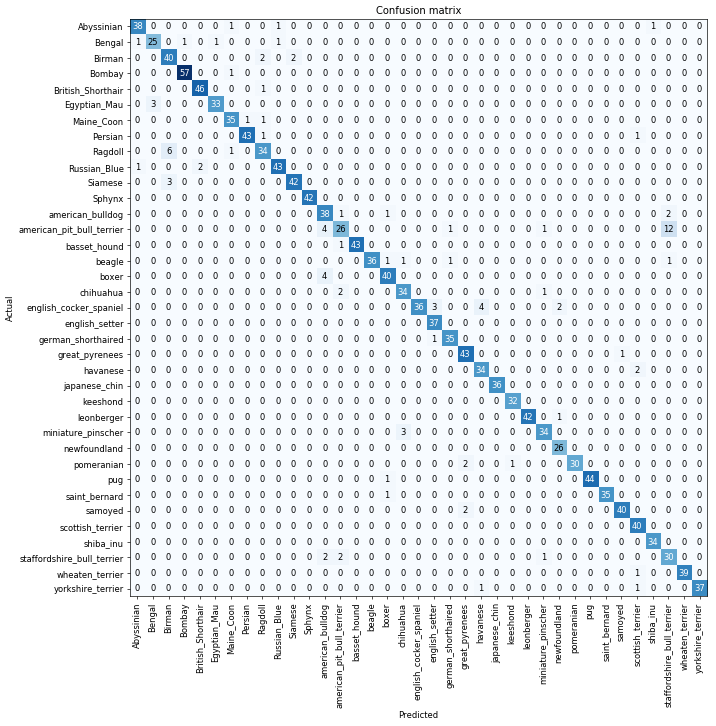

In [22]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

**Most confused categories**

In [23]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 12),
 ('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('boxer', 'american_bulldog', 4),
 ('english_cocker_spaniel', 'havanese', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Siamese', 'Birman', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('havanese', 'scottish_terrier', 2),
 ('pomeranian', 'great_pyrenees', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

**IMPROVING THE MODEL: Unfreezing, fine-tuning, and learning rates**

In [0]:
learn.unfreeze() #train the whole model

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.515003,0.347960,0.109608,54:31


In [0]:
learn.load('stage-1'); #Load the weights

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


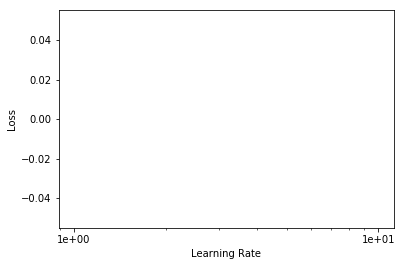

In [0]:
learn.recorder.plot()
plt.title("Loss Vs Learning Rate")

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-04)) #Pass a range of learning rates (here)

epoch,train_loss,valid_loss,error_rate,time
0,0.232276,0.208840,0.068336,01:55
1,0.210654,0.204037,0.061570,01:57


**Training: resnet50**

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

NameError: ignored

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 25188030.23it/s]


In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-3))

In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [0]:
learn.load('stage-1-50');

**Interpreting the results**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

**Other data formats**

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()

In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

In [0]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes